## Bài toán dự đoán giá nhà
- Đưa vào các thuộc tính căn nhà dự đoán giá (price)

### Bài tập
- Tiền xử lý dữ liệu cho trước: dữ liệu dự đoán giá nhà (xem thêm tại https://www.kaggle.com/harlfoxem/housesalesprediction)
- Xây dựng và đánh giá các mô hình KNN, Random Forest, Linear Regression, Ridge, Lasso
- Lựa chọn các siêu tham số cho từng mô hình
- So sánh các mô hình với nhau

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [6]:
dataset = pd.read_csv('kc_house_data.csv')
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
X = dataset.drop(['id', 'date', 'price'], axis=1)
y = dataset.price.values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Dữ liệu training = ", x_train.shape, y_train.shape)
print("Dữ liệu testing = ", x_test.shape, y_test.shape)

Dữ liệu training =  (17290, 18) (17290,)
Dữ liệu testing =  (4323, 18) (4323,)


In [ ]:
def evaluate_model_cv(model, X, y, cv=10, scoring='neg_root_mean_squared_error'):
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    scores = -scores if scoring.startswith('neg_') else scores
    return np.mean(scores), np.std(scores)

In [ ]:
def plot(title, xlabel, X_plot, Y_plot, error, ylabel = "mean_squared_error"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)
    plt.errorbar(X_plot, Y_plot, error, marker='o')

**KNN**

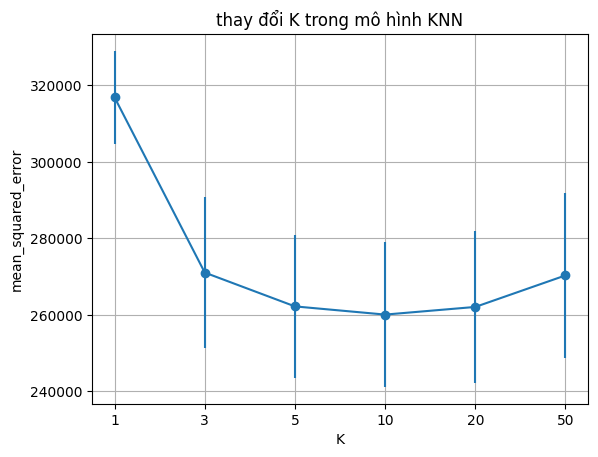

In [ ]:
title = "thay đổi K trong mô hình KNN"
xlabel = "K"
X_plot = []
Y_plot = []
error = []

for k in ([1, 3, 5, 10, 20, 50]):
    model = KNeighborsRegressor(n_neighbors=k)
    mean, std = evaluate_model_cv(model,x_train,y_train)
    X_plot.append(str(k))
    Y_plot.append(mean)
    error.append(std)

plot(title, xlabel, X_plot, Y_plot, error)
plt.show()

**random forest**

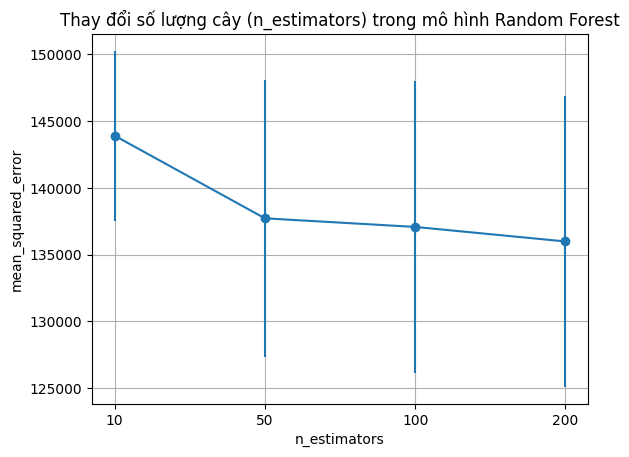

In [ ]:
title = "Thay đổi số lượng cây (n_estimators) trong mô hình Random Forest"
xlabel = "n_estimators"
X_plot = []
Y_plot = []
error = []

for n_estimators in [10, 50, 100, 200]:
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=20,
        criterion='absolute_error',
        random_state=4,
        n_jobs=-1
    )
    mean, std = evaluate_model_cv(model, x_train, y_train, cv=3)
    X_plot.append(str(n_estimators))
    Y_plot.append(mean)
    error.append(std)

plot(title, xlabel, X_plot, Y_plot, error)
plt.show()

**Ridge Regression**

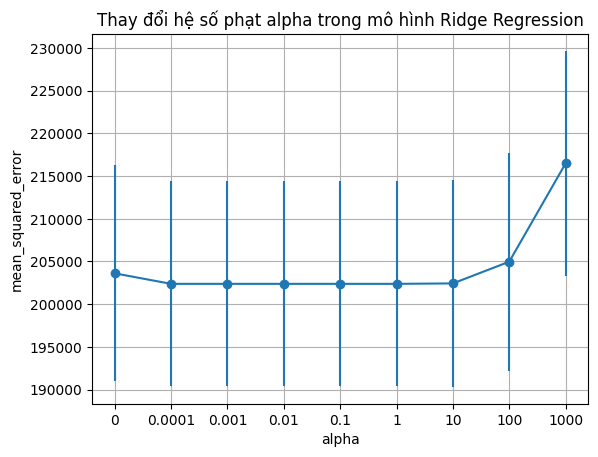

In [ ]:
title = "Thay đổi hệ số phạt alpha trong mô hình Ridge Regression"
xlabel = "alpha"
X_plot = []
Y_plot = []
error = []

for alpha in [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    model = Ridge(alpha=alpha)
    mean, std = evaluate_model_cv(model, x_train, y_train)
    X_plot.append(str(alpha))
    Y_plot.append(mean)
    error.append(std)

plot(title, xlabel, X_plot, Y_plot, error)
plt.show()

**Lasso Regression**

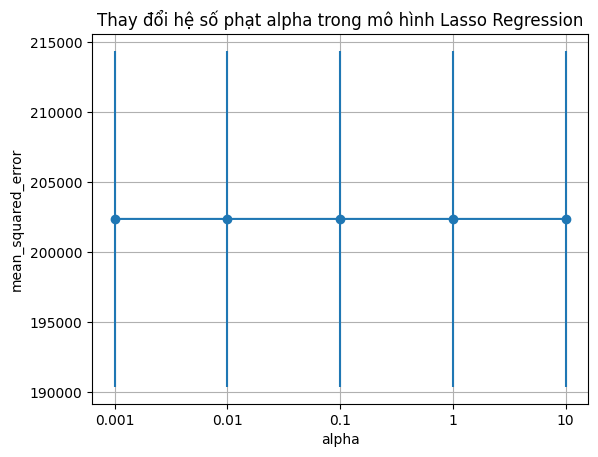

In [ ]:
title = "Thay đổi hệ số phạt alpha trong mô hình Lasso Regression"
xlabel = "alpha"
X_plot = []
Y_plot = []
error = []

for alpha in [0.001, 0.01, 0.1, 1, 10]:
    model = Lasso(alpha=alpha, max_iter=10000)
    mean, std = evaluate_model_cv(model, x_train, y_train)
    X_plot.append(str(alpha))
    Y_plot.append(mean)
    error.append(std)

plot(title, xlabel, X_plot, Y_plot, error)
plt.show()

In [7]:
rf = RandomForestRegressor(criterion='absolute_error', max_depth=20, n_estimators=200)
knn = KNeighborsRegressor(n_neighbors=10)
lrg = LinearRegression()
ridge = Ridge(alpha=0.1)
lasso = Lasso(alpha=10)
# Huấn luyện các mô hình trên tập dữ liệu train đầy đủ
rf.fit(x_train, y_train)
knn.fit(x_train, y_train)
lrg.fit(x_train, y_train)
ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.204e+14, tolerance: 2.354e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=10)

In [8]:
print(f'RF: {mean_absolute_error(y_test, rf.predict(x_test))}')
print(f'KNN: {mean_absolute_error(y_test, knn.predict(x_test))}')
print(f'Linear Regression: {mean_absolute_error(y_test, lrg.predict(x_test))}')
print(f'Ridge: {mean_absolute_error(y_test, ridge.predict(x_test))}')
print(f'Lasoo: {mean_absolute_error(y_test, lasso.predict(x_test))}')

RF: 71723.59668054593
KNN: 153156.3793661809
Linear Regression: 126368.1227360913
Ridge: 126365.85006986524
Lasoo: 126357.16541728702
